<b><center>Mutational Graph library</b></center><br>
First cell load all the needed libraries and functions

In [118]:
from libs.Functions_For_MutationalGraphs import *

# percent of alt alleles to add mutation label
# File containing label
# Default is AminoAcid labele for non synonymous mutations
def_min_val_label(15)
load_mut_names("libs/Mut_Nuc_AA_ORF.dic")

Var file format is a tab seprated file that should have :<br>
 - A fix header :<br>
 - All positions 1 to 29903 as first field of each line
 - The reference allele from the wuhan sequence as seconde filed
 - The number of each possible allele summing to the number of sanple for each line :<br>


<p style="font-family:'Lucida Console', monospace"><pre>
POS   REF  A    C    G    T    -    N
1     A    100  0    0    0    0    0
2     T    0    0    0    100  0    0
3     T    0    0    0    100  0    0
             (...)
3495  A    100  0    0    0    0    0
3496  G    0    0    100  99   1    0
3497  G    0    0    100  0    0    0
3498  C    0    27   0    0    0   73
3499  T    0    0    0    100  0    0
3500  A    100  0    0    0    0    0
</pre></p>

In [2]:
############################################################
####### This is a toy example with fake data ###############
#### Duplicate this cell and make your own graph ###########
############################################################

# The list of names will only be used as legend on the y axis
namelist=['Data'+str(i) for i in [1,2,3]]

# The list of path have to point on valid varfiles  (see definition above)
pathlist=["libs/fake"+i+".mutationalGraph.var" for i in namelist]

# Load of the files and transform it o a table list
tablelist=openfiles(pathlist)

# Create the list of position of interest using 
# - percentmin: alternative allele frequency have to be above this threshold in one of the table
# - addmissing: if true, consider missing data as an alternative allele
poslist=getpositions(tablelist,percentmin=25,addmissing=False)


# You may filter some positions here
poslist=[i for i in poslist if i>50 and i<29950]

# Finally plot the data
# - mytitle will be on the legend
# - addtotal will add as first line the sum of all the libraries
# - pdfname pdf file with the given name will be created
bighist(tablelist,poslist,namelist,mytitle="test",addtotal=False,PDFname="")



/home/rp/github/SARSCoV2_MutationnalGraph/libs/Functions_For_MutationalGraphs.py:181: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  n_min=t[set(t.columns)-set(['POS', 'REF'])].sum(axis=1)/100*percentmin
/home/rp/github/SARSCoV2_MutationnalGraph/libs/Functions_For_MutationalGraphs.py:182: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  n_max=t[set(t.columns)-set(['POS', 'REF'])].sum(axis=1)/100*percentmax


KeyError: '-'

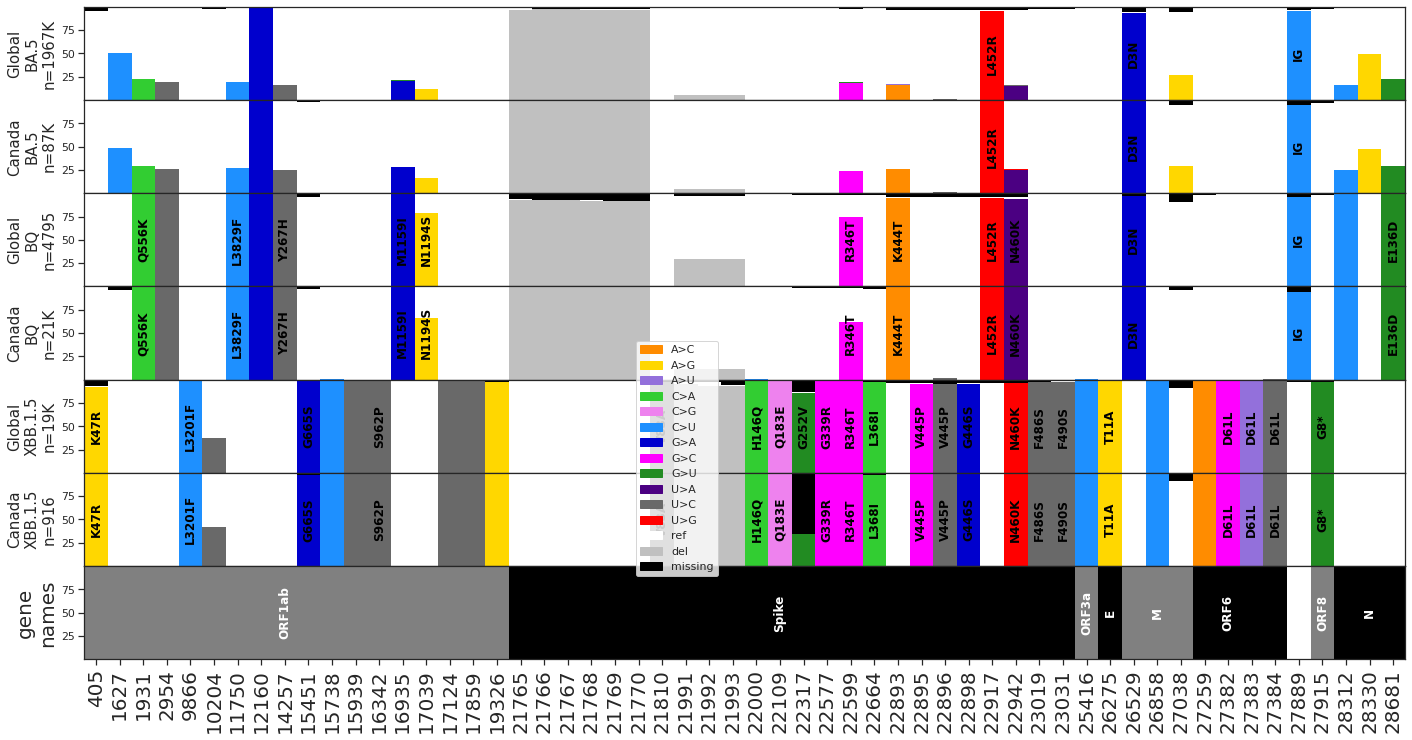

In [329]:
## An example !

p="/home/rp/"
namelist=["Global_BA.5","Canada_BA.5","Global_BQ","Canada_BQ","Global_XBB.1.5","Canada_XBB.1.5"]
pathlist=[p+i.replace("_","_variations_files/msaCodon_0210_")+".var" for i in namelist]

namelist=[i.replace("_","\n") for i in namelist]
tablelist=openfiles(pathlist)

pospos=[]
for t in tablelist:
    pospos+=getpositions([t],percentmin=25,addmissing=False)
poslist=[val for val,count in np.transpose(np.unique(pospos, return_counts=True)) if count!=len(pathlist)]
poslist+=[29942]
#poslist=getpositions(tablelist,percentmin=90,addmissing=False)

poslist=[i for i in poslist if i>50 and i<29850]

bighist(tablelist,poslist,namelist,mytitle="",PDFname="")
